# K-nearest Neighbors for NFL Play Prediction
**Author: Yuxin Deng**   

### Goal: Use a K-nearest neighbors regressor model to predict yardage (yards_gained) for NFL Running Plays

In [1]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt

## Part 1 - Understanding of Data

#### Background about Football
In football, yards are measured on the playing field as yard lines. Each yard line is marked every 10 yards across the playing field. The game is to won in points, but yards are important to the game as well. When a player on a team progresses down the field, they gain yards.  Yards gained are used as statistics in showing a player's abilities.

### Load Data

In [2]:
# Read Data
football=pd.read_csv('Football_NN.csv')
football.head(5)

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
0,269,3,95,3397,2,1,2.0,15,4,1,0,0,0,0,1,0,0,0
1,486,6,99,3230,4,1,1.0,10,6,1,0,0,0,1,0,0,0,0
2,675,12,66,3099,6,1,1.0,10,6,0,0,0,0,0,1,0,0,0
3,697,13,60,3070,6,1,2.0,4,3,1,0,0,0,0,1,0,0,0
4,718,14,57,3030,6,1,3.0,1,0,1,0,0,0,0,1,0,0,0


### Data Dictionary

* play_id: ID(NotMeaningful) 
* PlayOfGame: Number Of Plays In The Game Up Until That Point
* yardline_100: What Yard Is The Play Starting On
* game_seconds_remaining: How Long Is Left In The Game
* drive: How Many Times Has The Team Had The Ball
* qtr: What Quarter Is It down:Which Down Is It (YouHave4Downs/Plays) 
* ydstogo: How Many Yards To Get First Down 
* yards_gained: How Many Yards Were Gained
* shotgun: Type Of Play
* no_huddle: Type Of Play
* qb_dropback: Type Of Play 
* Run To Left: Runner went left 
* Run To Right: Runner went right
* Run Gap Center: There was a gap in the center 
* Run Gap End: There was a gap on the end 
* Run Gap Middle Right: There was a gap near the ends 
* core_differential_post: How Many Points Behind Is The Team With The Ball

In [3]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   play_id                  5298 non-null   int64  
 1   PlayOfGame               5298 non-null   int64  
 2   yardline_100             5298 non-null   int64  
 3   game_seconds_remaining   5298 non-null   int64  
 4   drive                    5298 non-null   int64  
 5   qtr                      5298 non-null   int64  
 6   down                     5287 non-null   float64
 7   ydstogo                  5298 non-null   int64  
 8   yards_gained             5298 non-null   int64  
 9   shotgun                  5298 non-null   int64  
 10  no_huddle                5298 non-null   int64  
 11  qb_dropback              5298 non-null   int64  
 12  Run To Left              5298 non-null   int64  
 13  Run To Right             5298 non-null   int64  
 14  Run Gap Center          

 ## Part 2 - EDA

### Using exploratory analysis drive the 5 variables for post modeling.

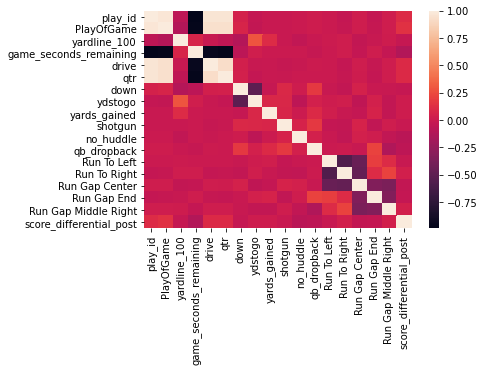

In [4]:
# Correlation Matrix
## Using the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix
corrMatrix = football.corr()
sn.heatmap(corrMatrix)
plt.show()

From the correlation matrix above chose 5 variables for modeling:
PlayOfGame; yardline_100; game_seconds_remaining; drive;score_differential_post


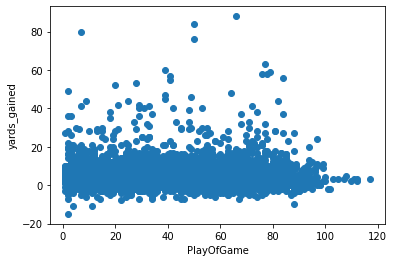

In [5]:
plt.scatter(football.PlayOfGame,football.yards_gained)
plt.xlabel("PlayOfGame")
plt.ylabel("yards_gained")

plt.show()

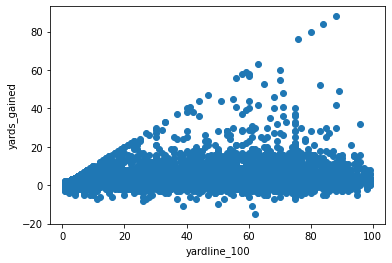

In [6]:
plt.scatter(football.yardline_100,football.yards_gained)
plt.xlabel("yardline_100")
plt.ylabel("yards_gained")

plt.show()


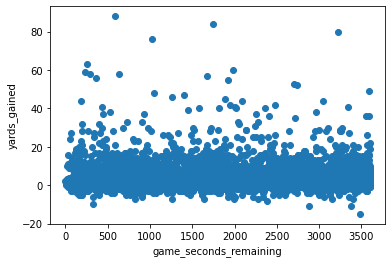

In [7]:

plt.scatter(football.game_seconds_remaining,football.yards_gained)
plt.xlabel("game_seconds_remaining")
plt.ylabel("yards_gained")

plt.show()


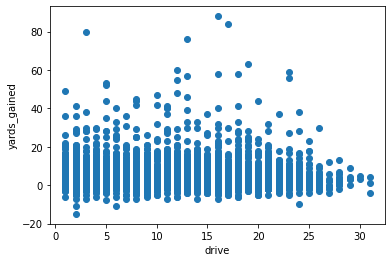

In [8]:
plt.scatter(football.drive,football.yards_gained)
plt.xlabel("drive")
plt.ylabel("yards_gained")

plt.show()

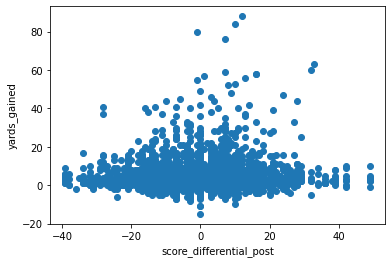

In [9]:
plt.scatter(football.score_differential_post,football.yards_gained)
plt.xlabel("score_differential_post")
plt.ylabel("yards_gained")

plt.show()

## Part 3 - Data Cleaning 

### Deal with Missing Value

In [10]:
# Check Missing Value
print(football.isnull().sum())

play_id                     0
PlayOfGame                  0
yardline_100                0
game_seconds_remaining      0
drive                       0
qtr                         0
down                       11
ydstogo                     0
yards_gained                0
shotgun                     0
no_huddle                   0
qb_dropback                 0
Run To Left                 0
Run To Right                0
Run Gap Center              0
Run Gap End                 0
Run Gap Middle Right        0
score_differential_post     0
dtype: int64


In [11]:
# Missing Values' Percentage of Column 'down'
print(len(football["down"][pd.isnull(football["down"])])/len(football))

0.0020762551906379767


Missing value in column 'down' no more than 1%. Therefore, it is acceptable to drop the missing value.

In [12]:
# Drop the Missing Value
f = football.dropna()

In [13]:
print(f.isnull().sum())

play_id                    0
PlayOfGame                 0
yardline_100               0
game_seconds_remaining     0
drive                      0
qtr                        0
down                       0
ydstogo                    0
yards_gained               0
shotgun                    0
no_huddle                  0
qb_dropback                0
Run To Left                0
Run To Right               0
Run Gap Center             0
Run Gap End                0
Run Gap Middle Right       0
score_differential_post    0
dtype: int64


### Drop the ID Column

In [14]:
f=f.drop(columns=['play_id'], inplace=False)

### Deal with Categorical Variables

I changed some categorical variables to the dummy variables. It will make all the variables in the data set have the suitable type to fit the model. 

In [15]:
f=pd.get_dummies(f)

## Part 4 - K-Nearest Neighbors Algorithm for Regression

### Create Train and Test Set

In [16]:
#Limit Model To Only Using 5 Variables
x=f[['PlayOfGame','yardline_100','game_seconds_remaining','drive','score_differential_post']]
y=f[['yards_gained']]

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=12)

### Preprocessing – Scaling the Features

One of the standardization is scaling features to lie between a given minimum and maximum value, often between zero and one. In this case I used MinMaxScaler function to achive it. 

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)



### Error Rate for Different k values

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K= K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 8.76501322513543
RMSE value for k=  2 is: 7.7376443777611135
RMSE value for k=  3 is: 7.34487644347366
RMSE value for k=  4 is: 7.1955345014241034
RMSE value for k=  5 is: 7.106460225570685
RMSE value for k=  6 is: 7.048771891981269
RMSE value for k=  7 is: 6.956681638209644
RMSE value for k=  8 is: 6.93146174064344
RMSE value for k=  9 is: 6.903430098014658
RMSE value for k=  10 is: 6.846587419602989


### Plotting the RMSE Values Against K Values

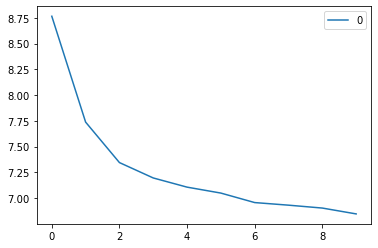

In [20]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

When k=1, we get a very high RMSE value.In addition, for a very low value of k, the model overfits on the training data, which leads to a high error rate on the validation set. The RMSE value decreases as we increase the k value. At k= 10, the RMSE is approximately 6.85, and we get slowly decresing k value. We can safely say that the higher level of k will give us the better result in this case. Therefore, in this case, I will chose k=15 to do the knn regression. 

### Predictions on the test dataset

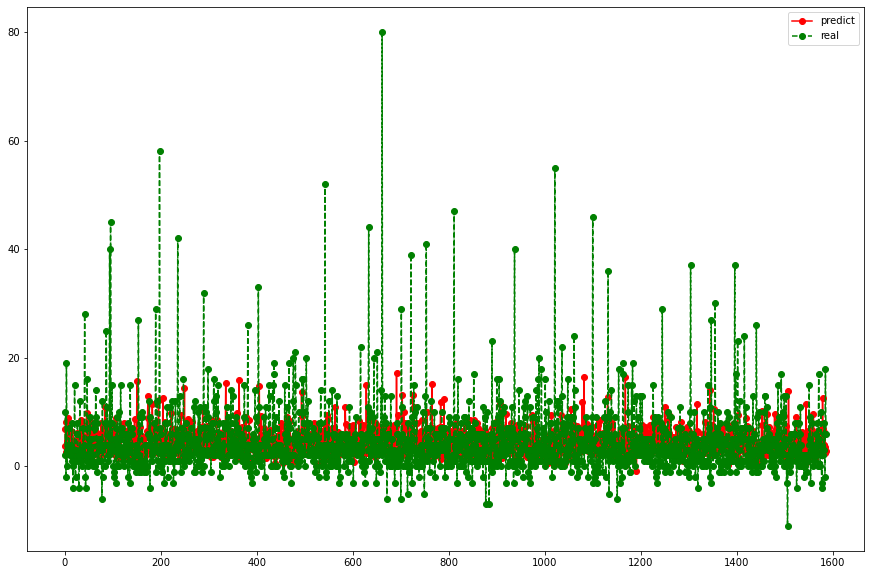

In [21]:
# Checking Prediction with Plot (n=10)
knn=KNeighborsRegressor(n_neighbors = 10)
knn.fit(x_train,y_train)
result=knn.predict(x_test)

plt.figure(figsize=(15, 10))
plt.plot(result, "ro-", label="predict")
plt.plot(y_test.values, "go--", label="real")


plt.legend(loc="best")
plt.show()

## Part 5 - Conclusions

* The project covered the workings of the KNN algorithm and its implementation in Python. 
* It’s one of the most basic, yet effective machine learning techniques.
* The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. 
* According to elbow curve, we can determine **the optimal K value of the model is 10**.

## Part 6 - Suggestions

The offense of American football starts from the formation. Factors such as the current score, kickoff position, remaining time, current number of gears, and the distance required for the first gear will constitute a "situation". The coaches of both sides will arrange personnel combinations based on this situation. According to the exploratory data analysis, we can find some interesting fact.

Let us see the relationship between **score_differential_post and yards_gained**.  
When the points of two teams are close, it is higher probability to gain more yards. We can imagine the that football players can get better mental statues when they have closes point and it is easier to try their best. 
On the contrary, if behind too many points with the opponent, it may be stressful for the player and it will influence their performance. 

Therefore,it is important for coach to do the mental guide before or in the game for each football player.  
